In [346]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BUDGET SENSITIVITY

In [67]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv")
df_mont_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_Txksw" / "results.csv")
df_cville_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_X9z7Y" / "results.csv")
#df_cville_edges = pd.concat([pd.read_csv(PROJECT_ROOT / "output" / "run_MGy75" / "results.csv"), df_cville_edges[df_cville_edges["budget"]<1800]])
#df_cville_edges = pd.concat([pd.read_csv(PROJECT_ROOT / "output" / "run_BJbPL" / "results.csv"), df_cville_edges[df_cville_edges["budget"]<2100]])

df_mont = df_mont.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df_cville = df_cville.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df_mont_edges = df_mont_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df_cville_edges = df_cville_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})

df_mont = df_mont.rename(columns={"agent":"Alg for MinExposed"})
df_cville = df_cville.rename(columns={"agent":"Alg for MinExposed"})
df_mont_edges = df_mont_edges.rename(columns={"agent":"Alg for MinExposed"})
df_cville_edges = df_cville_edges.rename(columns={"agent":"Alg for MinExposed"})

df_mont['infected'] = 100.0*df_mont['infection_count']/75457
df_cville['infected'] = 100.0*df_cville['infection_count']/131219
df_mont_edges['infected'] = 100.0*df_mont_edges['infection_count']/75457
df_cville_edges['infected'] = 100.0*df_cville_edges['infection_count']/131219
 
df_mont = pd.concat([df_mont[df_mont["Alg for MinExposed"] == "Random Sol"], df_mont[df_mont["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont[df_mont["Alg for MinExposed"] == "DepRound"], df_mont[df_mont["Alg for MinExposed"] == "DegGreedy"]])
df_cville = pd.concat([df_cville[df_cville["Alg for MinExposed"] == "Random Sol"], df_cville[df_cville["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville[df_cville["Alg for MinExposed"] == "DepRound"], df_cville[df_cville["Alg for MinExposed"] == "DegGreedy"]])
df_mont_edges = pd.concat([df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Random Sol"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DepRound"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DegGreedy"]])
df_cville_edges = pd.concat([df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Random Sol"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DepRound"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DegGreedy"]])

#-----------------------------------------------

df_mont_none = pd.read_csv(PROJECT_ROOT / "output" / "run_k3mHM" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_none['infected'] = 100.0*df_mont_none['infection_count']/75457

df_cville_none = pd.read_csv(PROJECT_ROOT / "output" / "run_RFUC4" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_none['infected'] = 100.0*df_cville_none['infection_count']/131219

df_mont_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_4f9WP" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_extra_none['infected'] = 100.0*df_mont_extra_none['infection_count']/75457

df_cville_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_GCQvG" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_extra_none['infected'] = 100.0*df_cville_extra_none['infection_count']/131219

#df_mont_extra_none["infection_list"] = df_mont_none["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
#df_mont_extra_none["time_steps"] = df_mont_none["infection_list"].apply(lambda x: len(x))
#df_mont_extra_none["time_step_peak"] = df_mont_none["infection_list"].apply(lambda x: x.index(max(x)))
#df_mont_extra_none["peak"] = df_mont_none["infection_list"].apply(lambda x: max(x))
#average_nointervention_peak = df_mont_none['peak'].mean()

#a = df_mont.iloc[[0,1],:].copy()

#average over 10 then plug in and hardcode

df_mont = pd.concat([df_mont, df_mont_none]).reset_index()

#-----------------------------------------------------------------------------

df_cville = pd.concat([df_cville, df_cville_none]).reset_index()

#--------------------------------------------------------------------------------

df_mont_edges = pd.concat([df_mont_edges, df_mont_extra_none]).reset_index()

#--------------------------------------------------------------------------------

df_cville_edges = pd.concat([df_cville_edges, df_cville_extra_none]).reset_index()

#----------------------------------------------------------------------------------

df_mont["infection_list"] = df_mont["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont["time_steps"] = df_mont["infection_list"].apply(lambda x: len(x))
df_mont["time_step_peak"] = df_mont["infection_list"].apply(lambda x: x.index(max(x)))
df_mont["peak"] = df_mont["infection_list"].apply(lambda x: max(x))
df_mont["peak"] = 100.0*df_mont["peak"]/75457

df_cville["infection_list"] = df_cville["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville["time_steps"] = df_cville["infection_list"].apply(lambda x: len(x))
df_cville["time_step_peak"] = df_cville["infection_list"].apply(lambda x: x.index(max(x)))
df_cville["peak"] = df_cville["infection_list"].apply(lambda x: max(x))
df_cville["peak"] = 100.0*df_cville["peak"]/131219

df_mont_edges["infection_list"] = df_mont_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont_edges["time_steps"] = df_mont_edges["infection_list"].apply(lambda x: len(x))
df_mont_edges["time_step_peak"] = df_mont_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_mont_edges["peak"] = df_mont_edges["infection_list"].apply(lambda x: max(x))
df_mont_edges["peak"] = 100.0*df_mont_edges["peak"]/75457

df_cville_edges["infection_list"] = df_cville_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville_edges["time_steps"] = df_cville_edges["infection_list"].apply(lambda x: len(x))
df_cville_edges["time_step_peak"] = df_cville_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_cville_edges["peak"] = df_cville_edges["infection_list"].apply(lambda x: max(x))
df_cville_edges["peak"] = 100.0*df_cville_edges["peak"]/131219

In [15]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv")
df_mont_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_Txksw" / "results.csv")
df_cville_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_X9z7Y" / "results.csv")

df_mont_none = pd.read_csv(PROJECT_ROOT / "output" / "run_k3mHM" / "results.csv")
df_cville_none = pd.read_csv(PROJECT_ROOT / "output" / "run_RFUC4" / "results.csv")
df_mont_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_4f9WP" / "results.csv")
df_cville_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_GCQvG" / "results.csv")

df = pd.concat([df_mont, df_mont_none, df_cville, df_cville_none, df_mont_edges, df_mont_extra_none,
               df_cville_edges, df_cville_extra_none])

df = df.replace({'NoIntervention':'None', 'Random':'Random Sol', 'EC':'Eigenvector Centrality', 
            'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "None"], df[df["Alg for MinExposed"] == "Random Sol"], df[df["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df[df["Alg for MinExposed"] == "DepRound"], df[df["Alg for MinExposed"] == "DegGreedy"]])

df_mont = df[df["G"] == "montgomery"]
df_cville = df[df["G"] == "cville"]
df_mont_edges = df[df["G"] == "montgomery_extra"]
df_cville_edges = df[df["G"] == "cville_extra"]

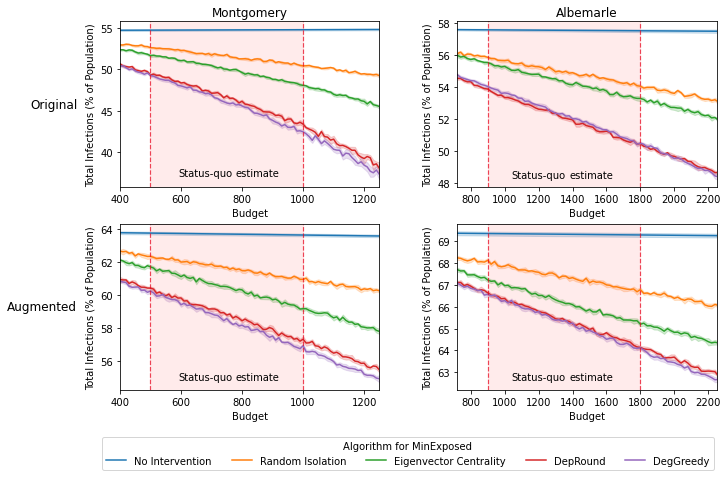

In [76]:
fig, ax = plt.subplots(2,2,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(680, 37.4, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(850, 37.4, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Total Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].text(1200, 48.5, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].text(1510, 48.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(680, 55, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(850, 55, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Total Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].text(1200, 62.8, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].text(1510, 62.8, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['No Intervention','Random Isolation','Eigenvector Centrality','DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)

fig.savefig("../output/plots/combined_total_infection.png", dpi=300, bbox_inches = 'tight')
plt.show()

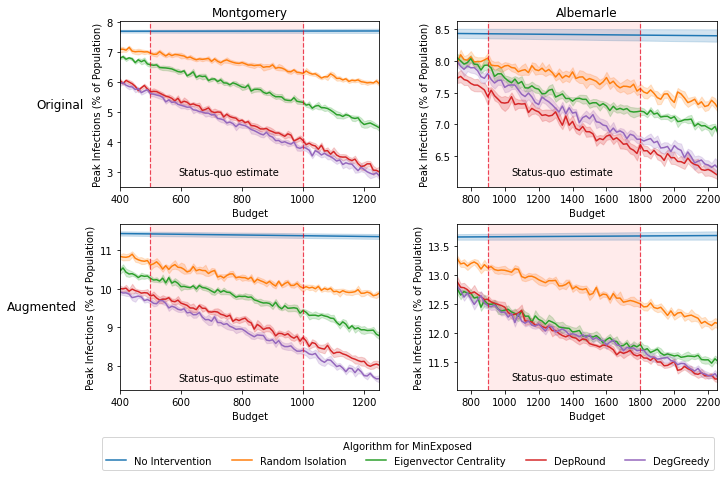

In [79]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Peak Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(680, 3, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(850, 3, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax1 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].text(1200, 6.25, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].text(1510, 6.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Peak Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(680, 7.7, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(850, 7.7, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].text(1200, 11.25, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].text(1510, 11.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['No Intervention', 'Random Isolation','Eigenvector Centrality','DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)

fig.savefig("../output/plots/combined_peak_infection.png", dpi=300, bbox_inches = 'tight')

plt.show()

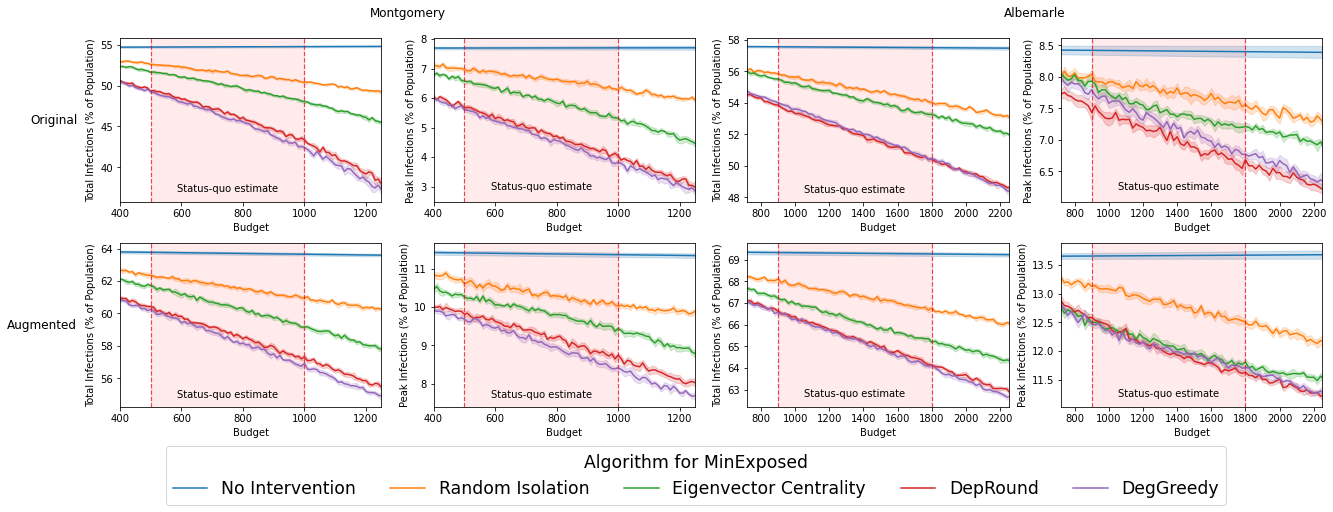

In [21]:
fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(750, 37.4, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 0].text(830, 37.4, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 2])
ax1.get_legend().remove()
ax[0, 2].set_xlabel("Budget")
ax[0, 2].set_ylabel("Total Infections (% of Population)")
ax[0, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].text(1350, 48.5, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 2].text(1510, 48.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 2].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax2 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax2.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(750, 55, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 0].text(830, 55, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax3 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[1, 2])
ax3.get_legend().remove()
ax[1, 2].set_xlabel("Budget")
ax[1, 2].set_ylabel("Total Infections (% of Population)")
ax[1, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].text(1350, 62.8, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 2].text(1510, 62.8, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 2].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

ax4 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax4.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].text(750, 3, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 1].text(850, 3, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 1].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax5 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 3])
ax5.get_legend().remove()
ax[0, 3].set_xlabel("Budget")
ax[0, 3].set_ylabel("Peak Infections (% of Population)")
ax[0, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].text(1350, 6.25, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 3].text(1510, 6.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 3].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax6 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 1])
ax6.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].text(750, 7.7, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 1].text(830, 7.7, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 1].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax7 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 3])
ax7.get_legend().remove()
ax[1, 3].set_xlabel("Budget")
ax[1, 3].set_ylabel("Peak Infections (% of Population)")
ax[1, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].text(1350, 11.25, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 3].text(1510, 11.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 3].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

pad = 5

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

ax[0, 0].annotate("Montgomery", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 2].annotate("Albemarle", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

#plt.figtext(0.28, 0.98, 'Montgomery', ha='center', va='center')
#plt.figtext(0.78, 0.98, 'Cville', ha='center', va='center')

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

legend = fig.legend(['No Intervention', 'Random Isolation','Eigenvector Centrality','DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, 
           bbox_to_anchor = (0.55, -0.15), fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize='xx-large')

plt.subplots_adjust(wspace = 0.2, hspace = 0.25)

fig.set_figwidth(20)

fig.savefig("../output/plots/combined_budget_sensitivity.png", dpi=300, bbox_inches = 'tight')

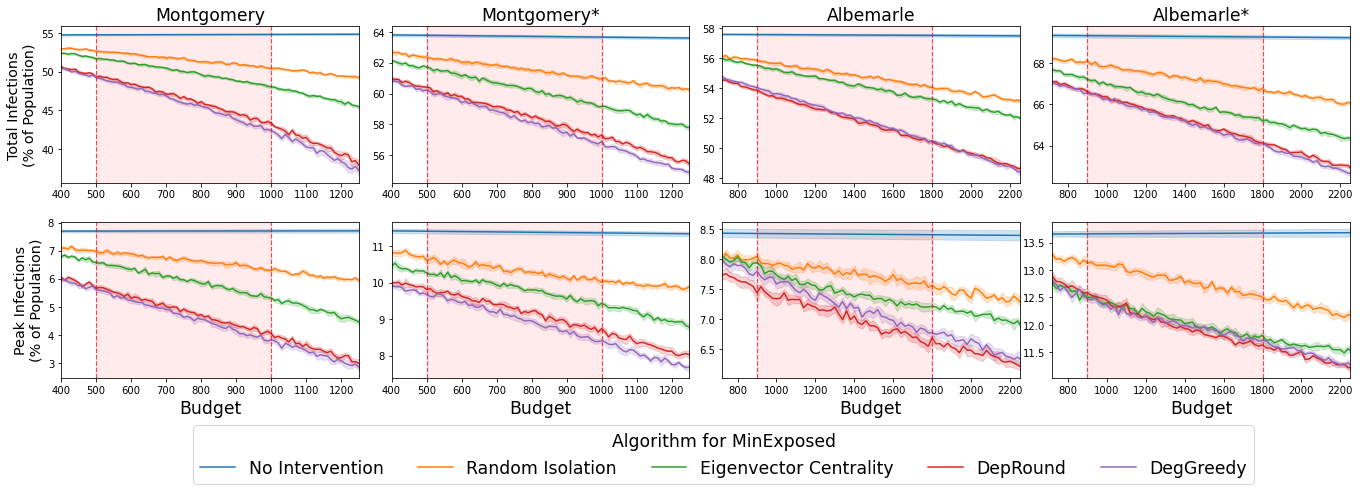

In [43]:
fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections\n(% of Population)", fontsize='x-large')
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 0].text(750, 37.4, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 0].text(830, 37.4, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 2])
ax1.get_legend().remove()
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 2].text(1350, 48.5, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 2].text(1510, 48.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 2].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax2 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 1])
ax2.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 1].text(750, 55, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 0].text(830, 55, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 1].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax3 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[0, 3])
ax3.get_legend().remove()
ax[0, 3].set_xlabel("")
ax[0, 3].set_ylabel("")
ax[0, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 3].text(1350, 62.8, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 2].text(1510, 62.8, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 3].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

ax4 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 0])
ax4.get_legend().remove()
ax[1, 0].set_xlabel("Budget", fontsize='xx-large')
ax[1, 0].set_ylabel("Peak Infections\n(% of Population)", fontsize='x-large')
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 0].text(750, 3, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 1].text(850, 3, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax5 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 2])
ax5.get_legend().remove()
#ax5.get_yaxis().set_visible(False)
ax[1, 2].set_xlabel("Budget", fontsize='xx-large')
ax[1, 2].set_ylabel("")
ax[1, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 2].text(1350, 6.25, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 3].text(1510, 6.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 2].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax6 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 1])
ax6.get_legend().remove()
#ax6.get_yaxis().set_visible(False)
ax[1, 1].set_xlabel("Budget", fontsize='xx-large')
ax[1, 1].set_ylabel("")
ax[1, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 1].text(750, 7.7, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 1].text(830, 7.7, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 1].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax7 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 3])
ax7.get_legend().remove()
ax[1, 3].set_xlabel("Budget", fontsize = "xx-large")
ax[1, 3].set_ylabel("")
ax[1, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 3].text(1350, 11.25, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 3].text(1510, 11.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 3].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

pad = 5

ax0.set_title("Montgomery", fontsize='xx-large')
ax1.set_title("Albemarle", fontsize='xx-large')
ax2.set_title("Montgomery*", fontsize='xx-large')
ax3.set_title("Albemarle*", fontsize='xx-large')

#ax[0, 0].annotate("Total", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
#ax[1, 0].annotate("Peak", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

#ax[0, 0].annotate("Montgomery", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
#ax[0, 2].annotate("Albemarle", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

#plt.figtext(0.28, 0.98, 'Montgomery', ha='center', va='center')
#plt.figtext(0.78, 0.98, 'Cville', ha='center', va='center')

fig.tight_layout()
#fig.subplots_adjust(left=0.15, top=0.95)

legend = fig.legend(['No Intervention', 'Random Isolation','Eigenvector Centrality','DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, 
           bbox_to_anchor = (0.55, -0.15), fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize='xx-large')

plt.subplots_adjust(wspace = 0.11, hspace = 0.25)

fig.set_figwidth(20)

fig.savefig("../output/plots/combined_budget_sensitivity.png", dpi=500, bbox_inches = 'tight')

## COMPLIANCE SENSITIVITY

In [297]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_gU5XV" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_2ixbp" / "results.csv")
df_mont_budget = pd.read_csv(PROJECT_ROOT / "output" / "run_KRmS4" / "results.csv")

df = pd.concat([df_mont, df_cville])

df = df.replace({'NoIntervention':'None', 'Random':'Random Sol', 'EC':'Eigenvector Centrality', 
            'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "Random Sol"], df[df["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df[df["Alg for MinExposed"] == "DepRound"], df[df["Alg for MinExposed"] == "DegGreedy"]])

df_mont = df[df["G"] == "montgomery"]
df_cville = df[df["G"] == "cville"]

             G policy  transmission_rate  transmission_known  compliance_rate  \
0   montgomery   none               0.05                True             0.67   
1   montgomery   none               0.05                True             0.69   
2   montgomery   none               0.05                True             0.58   
3   montgomery   none               0.05                True             0.53   
4   montgomery   none               0.05                True             0.68   
5   montgomery   none               0.05                True             0.51   
6   montgomery   none               0.05                True             0.62   
7   montgomery   none               0.05                True             0.66   
8   montgomery   none               0.05                True             0.65   
9   montgomery   none               0.05                True             0.54   
10  montgomery   none               0.05                True             0.52   
11  montgomery   none       

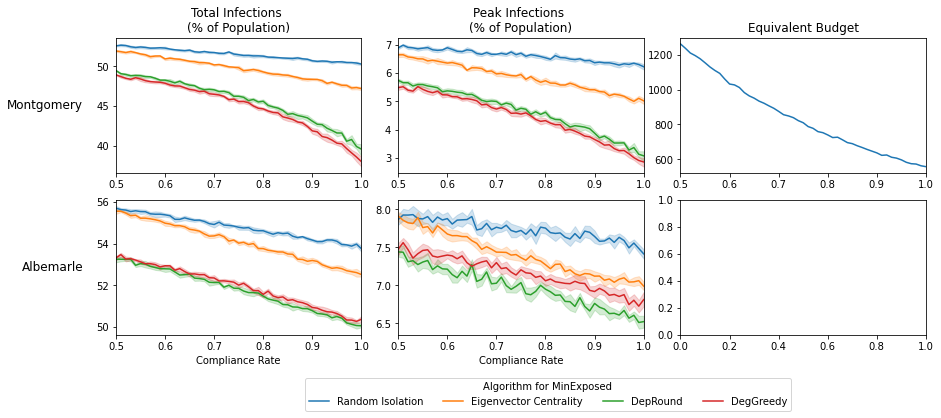

In [312]:
fig, ax = plt.subplots(2, 3, figsize=(10,5))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0,0].set_xlabel("")
ax[0, 0].set_ylabel("")
ax[0, 0].set_xlim(0.5, 1)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax2 = sns.lineplot(data=df_mont, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[0, 1])
ax2.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlim(0.5, 1)

ax1 = sns.lineplot(data=df_cville, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[1, 0])
ax1.get_legend().remove()
ax[1, 0].set_xlabel("Compliance Rate")
ax[1, 0].set_ylabel("")
ax[1, 0].set_xlim(0.5, 1)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

ax1 = sns.lineplot(data=df_cville, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax1.get_legend().remove()
ax[1, 1].set_xlabel("Compliance Rate")
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlim(0.5, 1)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

ax3 = sns.lineplot(data=df_mont_budget, x="compliance_rate", y="equivalent_budget", ax=ax[0, 2])
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].set_xlim(0.5, 1)

pad = 5

ax[0, 0].annotate("Montgomery", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Albemarle", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

ax[0,0].set_title("Total Infections \n(% of Population)")
ax[0,1].set_title("Peak Infections \n(% of Population)")
ax[0,2].set_title("Equivalent Budget")

plt.subplots_adjust(wspace = 0.15, hspace = 0.2)
fig.subplots_adjust(left=0.15, top=0.95)
fig.set_figwidth(15)
fig.legend(['Random Isolation','Eigenvector Centrality','DepRound', 'DegGreedy'], title='Algorithm for MinExposed', loc="lower center", ncol = 4, bbox_to_anchor=(0.55, -0.1), prop={'size':10})

fig.savefig("../output/plots/combined_compliance_budget_sensitivity.png", dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_KRmS4" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_BAXtW" / "results.csv")
print(df_cville)
#print(df_cville)
#print(df_mont)
import seaborn as sns
sns.lineplot(data = df_mont, x = "compliance_rate", y = "equivalent_budget", hue = "agent")
plt.show()
sns.lineplot(data = df_cville, x = "discovery_rate", y = "equivalent_budget", hue = "agent")
plt.show()

In [27]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_CuHWm" / "results.csv")
df_mont = pd.concat([df_mont, pd.read_csv(PROJECT_ROOT / "output" / "run_Ycb3k" / "results.csv")])
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_FjbX3" / "results.csv")

df = pd.concat([df_mont, df_cville])

df = df.replace({'NoIntervention':'None', 'Random':'Random Sol', 'EC':'Eigenvector Centrality', 
            'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "Random Sol"], df[df["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df[df["Alg for MinExposed"] == "DepRound"], df[df["Alg for MinExposed"] == "DegGreedy"]])

df_mont = df[df["G"] == "montgomery_extra"]
df_cville = df[df["G"] == "cville_extra"]

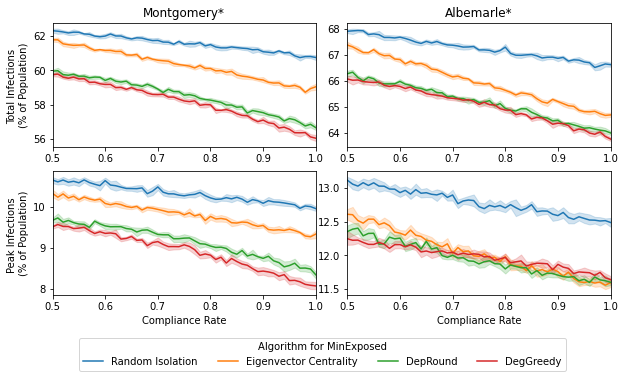

In [29]:
fig, ax = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(wspace = .3)

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0,0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)")
ax[0, 0].set_xlim(0.5, 1)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_cville, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlim(0.5, 1)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

ax2 = sns.lineplot(data=df_mont, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 0])
ax2.get_legend().remove()
ax[1, 0].set_xlabel("Compliance Rate")
ax[1, 0].set_ylabel("Peak Infections \n(% of Population)")
ax[1, 0].set_xlim(0.5, 1)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax3 = sns.lineplot(data=df_cville, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax3.get_legend().remove()
ax[1, 1].set_xlabel("Compliance Rate")
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlim(0.5, 1)

ax[0,0].set_title("Montgomery*")
ax[0,1].set_title("Albemarle*")

plt.subplots_adjust(wspace = 0.12, hspace = 0.2)
fig.legend(['Random Isolation','Eigenvector Centrality','DepRound', 'DegGreedy'], title='Algorithm for MinExposed', loc="lower center", ncol = 4, bbox_to_anchor=(0.5, -0.1), prop={'size':10})
fig.savefig("../output/plots/combined_compliance_sensitivity_extra.png", dpi=300, bbox_inches = 'tight')
plt.show()

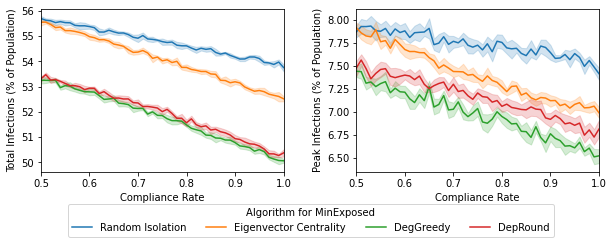

In [138]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .3)

import seaborn as sns

ax0 = sns.lineplot(data=df_cville, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Compliance Rate")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].set_xlim(0.5, 1)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_cville, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Compliance Rate")
ax[1].set_ylabel("Peak Infections (% of Population)")
ax[1].set_xlim(0.5, 1)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

fig.legend(['Random Isolation','Eigenvector Centrality','DegGreedy','DepRound'], title='Algorithm for MinExposed', loc="lower center", ncol = 4, bbox_to_anchor=(0.5, -0.2), prop={'size':10})
#fig.savefig("../output/plots/cville_compliance_sensitivity.png", dpi=300, bbox_inches = 'tight')
plt.show()

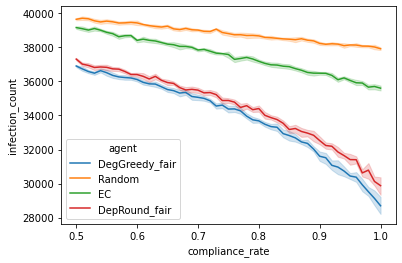

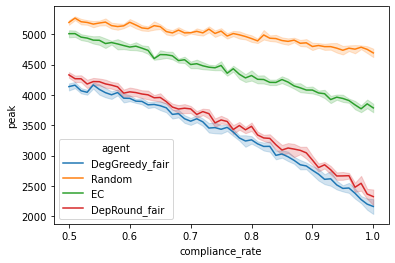

In [10]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_gU5XV" / "results.csv")

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

import seaborn as sns
sns.lineplot(data = df, x = "compliance_rate", y ="infection_count", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "compliance_rate", y ="peak", hue = "agent")
plt.show()

## Snitch and Discovery

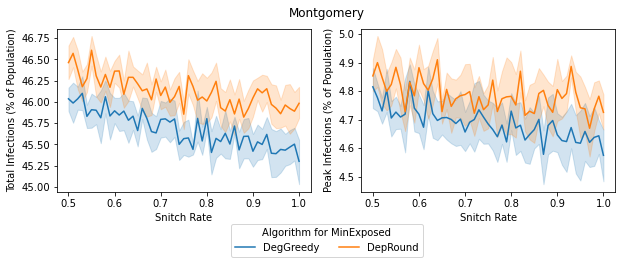

In [179]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_QKe9u" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]
df = df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

df = df.replace({'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .2)

import seaborn as sns
ax0 = sns.lineplot(data = df, x = "snitch_rate", y ="infected", hue = "Alg for MinExposed", ax = ax[0])
ax0.get_legend().remove()
ax0.set_xlabel("Snitch Rate")
ax0.set_ylabel("Total Infections (% of Population)")
ax1 = sns.lineplot(data = df, x = "snitch_rate", y ="peak", hue = "Alg for MinExposed", ax = ax[1])
ax1.get_legend().remove()
ax1.set_xlabel("Snitch Rate")
ax1.set_ylabel("Peak Infections (% of Population)")

#plt.savefig("../output/plots/combined_snitch_rate.png", dpi=300, bbox_inches = 'tight')
fig.legend(['DegGreedy','DepRound'], title='Algorithm for MinExposed', loc="lower center", ncol = 2, bbox_to_anchor=(0.5, -0.2), prop={'size':10})
fig.suptitle("Montgomery")
plt.show()

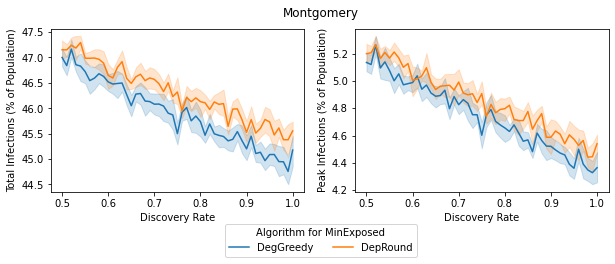

In [177]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Erx5i" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]
df = df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .2)

import seaborn as sns
ax0 = sns.lineplot(data = df, x = "discovery_rate", y ="infected", hue = "Alg for MinExposed", ax = ax[0])
ax0.get_legend().remove()
ax0.set_xlabel("Discovery Rate")
ax0.set_ylabel("Total Infections (% of Population)")
ax1 = sns.lineplot(data = df, x = "discovery_rate", y ="peak", hue = "Alg for MinExposed", ax = ax[1])
ax1.get_legend().remove()
ax1.set_xlabel("Discovery Rate")
ax1.set_ylabel("Peak Infections (% of Population)")

fig.legend(['DegGreedy','DepRound'], title='Algorithm for MinExposed', loc="lower center", ncol = 2, bbox_to_anchor=(0.5, -0.2), prop={'size':10})
#plt.savefig("../output/plots/combined_discovery_rate.png", dpi=300, bbox_inches = 'tight')
fig.suptitle("Montgomery")
plt.show()

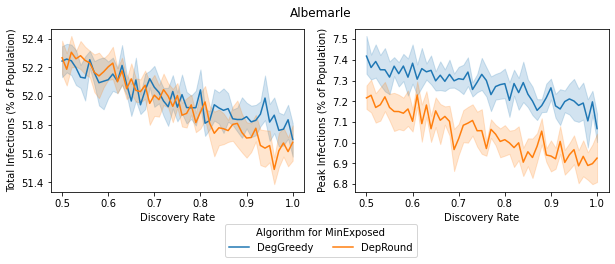

In [176]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_htnRM" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]
df_2 = pd.read_csv(PROJECT_ROOT / "output" / "run_YQQZN" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df = pd.concat([df[df["discovery_rate"]<= 0.74], df_2])
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .2)

import seaborn as sns
ax0 = sns.lineplot(data = df, x = "discovery_rate", y ="infected", hue = "Alg for MinExposed", ax = ax[0])
ax0.get_legend().remove()
ax0.set_xlabel("Discovery Rate")
ax0.set_ylabel("Total Infections (% of Population)")
ax1 = sns.lineplot(data = df, x = "discovery_rate", y ="peak", hue = "Alg for MinExposed", ax = ax[1])
ax1.get_legend().remove()
ax1.set_xlabel("Discovery Rate")
ax1.set_ylabel("Peak Infections (% of Population)")

#plt.savefig("../output/plots/cville_discovery_rate.png", dpi=300, bbox_inches = 'tight')
fig.legend(['DegGreedy','DepRound'], title='Algorithm for MinExposed', loc="lower center", ncol = 2, bbox_to_anchor=(0.5, -0.2), prop={'size':10})
fig.suptitle("Albemarle")

plt.show()

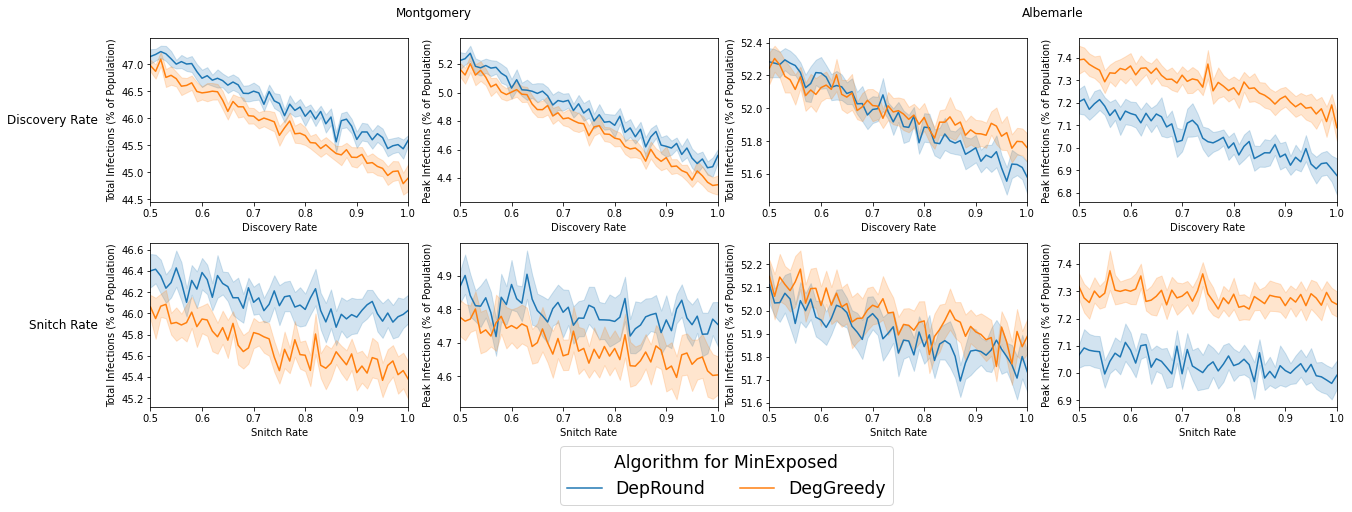

In [46]:
df_mont_s = pd.read_csv(PROJECT_ROOT / "output" / "run_QKe9u" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_mont_s = pd.concat([df_mont_s, pd.read_csv(PROJECT_ROOT / "output" / "run_X8fWz" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_mont_s["var"] = "Montgomery Snitch"

df_cville_s = pd.read_csv(PROJECT_ROOT / "output" / "run_a23Ud" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_cville_s = pd.concat([df_cville_s, pd.read_csv(PROJECT_ROOT / "output" / "run_CcF8X" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_cville_s["var"] = "Cville Snitch"

df_mont_d = pd.read_csv(PROJECT_ROOT / "output" / "run_Erx5i" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_mont_d = pd.concat([df_mont_d, pd.read_csv(PROJECT_ROOT / "output" / "run_6mxs9" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})])
df_mont_d["var"] = "Montgomery Discovery"

df_cville_d = pd.read_csv(PROJECT_ROOT / "output" / "run_htnRM" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_cville_d = pd.concat([df_cville_d[df_cville_d["discovery_rate"]<=0.74], pd.read_csv(PROJECT_ROOT / "output" / "run_YQQZN" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
, pd.read_csv(PROJECT_ROOT / "output" / "run_jRaTT" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_cville_d["var"] = "Cville Discovery"

#print(len(df_mont_s))
#print(len(df_mont_d))
#print(len(df_cville_s))
#print(len(df_cville_d))

df = pd.concat([df_mont_d, df_cville_d, df_mont_s, df_cville_s])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"]=="DepRound"], df[df["Alg for MinExposed"]=="DegGreedy"]])

df_mont_d = df[df["var"] == "Montgomery Discovery"]
df_cville_d = df[df["var"] == "Cville Discovery"]
df_mont_s = df[df["var"] == "Montgomery Snitch"]
df_cville_s = df[df["var"] == "Cville Snitch"]

#_______________________________________________________________________________________#

fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont_d, x="discovery_rate", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Discovery Rate")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].set_xlim(0.5, 1)

ax1 = sns.lineplot(data=df_mont_d, x="discovery_rate", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Discovery Rate")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].set_xlim(0.5, 1)
#ax[0, 1].set_ylim(45,60)

ax2 = sns.lineplot(data=df_cville_d, x="discovery_rate", y="infected", hue="Alg for MinExposed", ax= ax[0, 2])
ax2.get_legend().remove()
ax[0, 2].set_xlabel("Discovery Rate")
ax[0, 2].set_ylabel("Total Infections (% of Population)")
ax[0, 2].set_xlim(0.5, 1)
#ax[1, 0].set_ylim(50,65)

ax3 = sns.lineplot(data=df_cville_d, x="discovery_rate", y="peak", hue="Alg for MinExposed", ax=ax[0, 3])
ax3.get_legend().remove()
ax[0, 3].set_xlabel("Discovery Rate")
ax[0, 3].set_ylabel("Peak Infections (% of Population)")
ax[0, 3].set_xlim(0.5, 1)
#ax[1, 1].set_ylim(50,70)

ax4 = sns.lineplot(data=df_mont_s, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax4.get_legend().remove()
ax[1, 0].set_xlabel("Snitch Rate")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].set_xlim(0.5, 1)
#ax[0, 0].set_ylim(40,56)

ax5 = sns.lineplot(data=df_mont_s, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax= ax[1, 1])
ax5.get_legend().remove()
ax[1, 1].set_xlabel("Snitch Rate")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].set_xlim(0.5, 1)
#ax[0, 1].set_ylim(45,60)

ax6 = sns.lineplot(data=df_cville_s, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax= ax[1, 2])
ax6.get_legend().remove()
ax[1, 2].set_xlabel("Snitch Rate")
ax[1, 2].set_ylabel("Total Infections (% of Population)")
ax[1, 2].set_xlim(0.5, 1)
#ax[1, 0].set_ylim(50,65)

ax7 = sns.lineplot(data=df_cville_s, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 3])
ax7.get_legend().remove()
ax[1, 3].set_xlabel("Snitch Rate")
ax[1, 3].set_ylabel("Peak Infections (% of Population)")
ax[1, 3].set_xlim(0.5, 1)
#ax[1, 1].set_ylim(50,70)

pad = 5

ax[0, 0].annotate("Discovery Rate", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Snitch Rate", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

ax[0, 0].annotate("Montgomery", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 2].annotate("Albemarle", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

#plt.figtext(0.28, 0.98, 'Montgomery', ha='center', va='center')
#plt.figtext(0.78, 0.98, 'Cville', ha='center', va='center')

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

legend = fig.legend(['DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 2, bbox_to_anchor = (0.55, -0.15), fontsize = "xx-large")
plt.setp(legend.get_title(),fontsize='xx-large')

plt.subplots_adjust(wspace = 0.2, hspace = 0.25)

fig.set_figwidth(20)

fig.savefig("../output/plots/combined_infoloss_sensitivity.png", dpi=300, bbox_inches = 'tight')

In [ ]:
df_mont_s = pd.read_csv(PROJECT_ROOT / "output" / "run_hDFLa" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_mont_s = pd.concat([df_mont_s, pd.read_csv(PROJECT_ROOT / "output" / "run_X8fWz" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_mont_s["var"] = "Montgomery Snitch"

df_cville_s = pd.read_csv(PROJECT_ROOT / "output" / "run_Tv6HR" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_cville_s = pd.concat([df_cville_s, pd.read_csv(PROJECT_ROOT / "output" / "run_CcF8X" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_cville_s["var"] = "Cville Snitch"

df_mont_d = pd.read_csv(PROJECT_ROOT / "output" / "run_DvfNg" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_mont_d = pd.concat([df_mont_d, pd.read_csv(PROJECT_ROOT / "output" / "run_6mxs9" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})])
df_mont_d["var"] = "Montgomery Discovery"

df_cville_d = pd.read_csv(PROJECT_ROOT / "output" / "run_Msskn" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
df_cville_d = pd.concat([df_cville_d[df_cville_d["discovery_rate"]<=0.74], pd.read_csv(PROJECT_ROOT / "output" / "run_YQQZN" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
, pd.read_csv(PROJECT_ROOT / "output" / "run_jRaTT" / "results.csv").replace({"DegGreedy_fair": "DegGreedy", "DepRound_fair": "DepRound"})
])
df_cville_d["var"] = "Cville Discovery"

#print(len(df_mont_s))
#print(len(df_mont_d))
#print(len(df_cville_s))
#print(len(df_cville_d))

df = pd.concat([df_mont_d, df_cville_d, df_mont_s, df_cville_s])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"]=="DepRound"], df[df["Alg for MinExposed"]=="DegGreedy"]])

df_mont_d = df[df["var"] == "Montgomery Discovery"]
df_cville_d = df[df["var"] == "Cville Discovery"]
df_mont_s = df[df["var"] == "Montgomery Snitch"]
df_cville_s = df[df["var"] == "Cville Snitch"]

#_______________________________________________________________________________________#

fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont_d, x="discovery_rate", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Discovery Rate")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].set_xlim(0.5, 1)

ax1 = sns.lineplot(data=df_mont_d, x="discovery_rate", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Discovery Rate")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].set_xlim(0.5, 1)
#ax[0, 1].set_ylim(45,60)

ax2 = sns.lineplot(data=df_cville_d, x="discovery_rate", y="infected", hue="Alg for MinExposed", ax= ax[0, 2])
ax2.get_legend().remove()
ax[0, 2].set_xlabel("Discovery Rate")
ax[0, 2].set_ylabel("Total Infections (% of Population)")
ax[0, 2].set_xlim(0.5, 1)
#ax[1, 0].set_ylim(50,65)

ax3 = sns.lineplot(data=df_cville_d, x="discovery_rate", y="peak", hue="Alg for MinExposed", ax=ax[0, 3])
ax3.get_legend().remove()
ax[0, 3].set_xlabel("Discovery Rate")
ax[0, 3].set_ylabel("Peak Infections (% of Population)")
ax[0, 3].set_xlim(0.5, 1)
#ax[1, 1].set_ylim(50,70)

ax4 = sns.lineplot(data=df_mont_s, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax4.get_legend().remove()
ax[1, 0].set_xlabel("Snitch Rate")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].set_xlim(0.5, 1)
#ax[0, 0].set_ylim(40,56)

ax5 = sns.lineplot(data=df_mont_s, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax= ax[1, 1])
ax5.get_legend().remove()
ax[1, 1].set_xlabel("Snitch Rate")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].set_xlim(0.5, 1)
#ax[0, 1].set_ylim(45,60)

ax6 = sns.lineplot(data=df_cville_s, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax= ax[1, 2])
ax6.get_legend().remove()
ax[1, 2].set_xlabel("Snitch Rate")
ax[1, 2].set_ylabel("Total Infections (% of Population)")
ax[1, 2].set_xlim(0.5, 1)
#ax[1, 0].set_ylim(50,65)

ax7 = sns.lineplot(data=df_cville_s, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 3])
ax7.get_legend().remove()
ax[1, 3].set_xlabel("Snitch Rate")
ax[1, 3].set_ylabel("Peak Infections (% of Population)")
ax[1, 3].set_xlim(0.5, 1)
#ax[1, 1].set_ylim(50,70)

pad = 5

ax[0, 0].annotate("Discovery Rate", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Snitch Rate", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

ax[0, 0].annotate("Montgomery*", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 2].annotate("Albemarle*", xy=(1.1, 1.1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

#plt.figtext(0.28, 0.98, 'Montgomery', ha='center', va='center')
#plt.figtext(0.78, 0.98, 'Cville', ha='center', va='center')

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

legend = fig.legend(['DepRound','DegGreedy'],title='Algorithm for MinExposed',loc = "lower center", ncol = 2, bbox_to_anchor = (0.55, -0.15), fontsize = "xx-large")
plt.setp(legend.get_title(),fontsize='xx-large')

plt.subplots_adjust(wspace = 0.2, hspace = 0.25)

fig.set_figwidth(20)

fig.savefig("../output/plots/combined_infoloss_sensitivity.png", dpi=300, bbox_inches = 'tight')

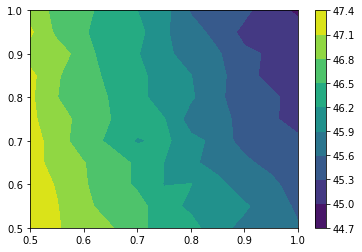

In [13]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_jxFkV" / "results.csv")

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='infected').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

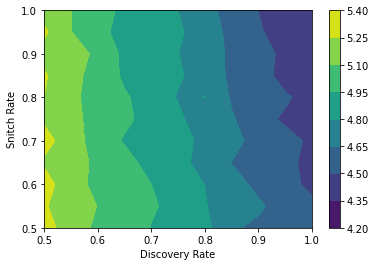

In [196]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_jxFkV" / "results.csv")

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='peak').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.xlabel("Discovery Rate")
plt.ylabel("Snitch Rate")
plt.show()

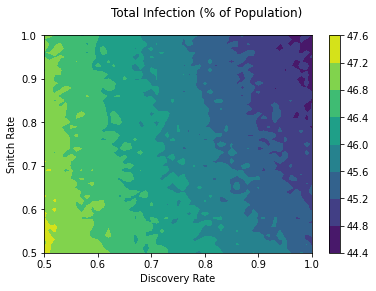

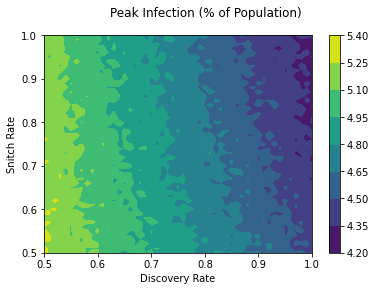

In [321]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Uepgy" / "results.csv")
df = pd.concat([df[df["discovery_rate"]< 0.80], pd.read_csv(PROJECT_ROOT / "output" / "run_Jnqc3" / "results.csv")])
df = df[df["agent"] == "DegGreedy_fair"]

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='infected').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.suptitle("Total Infection (% of Population)")
plt.xlabel("Discovery Rate")
plt.ylabel("Snitch Rate")
plt.show()

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='peak').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.suptitle("Peak Infection (% of Population)")
plt.xlabel("Discovery Rate")
plt.ylabel("Snitch Rate")
plt.show()

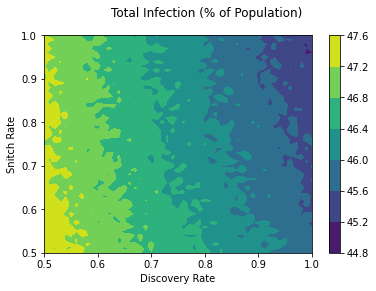

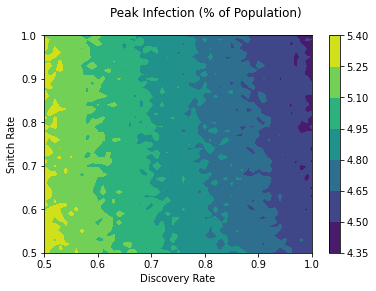

In [316]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Uepgy" / "results.csv")
df = pd.concat([df[df["discovery_rate"]< 0.80], pd.read_csv(PROJECT_ROOT / "output" / "run_Jnqc3" / "results.csv")])
df = df[df["agent"] == "DepRound_fair"]

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='infected').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.suptitle("Total Infection (% of Population)")
plt.xlabel("Discovery Rate")
plt.ylabel("Snitch Rate")
plt.show()

Z = df.pivot_table(index='discovery_rate', columns='snitch_rate', values='peak').T.values

X_unique = np.sort(df.discovery_rate.unique())
Y_unique = np.sort(df.snitch_rate.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.suptitle("Peak Infection (% of Population)")
plt.xlabel("Discovery Rate")
plt.ylabel("Snitch Rate")
plt.show()

## APPROXIMATION RATIO

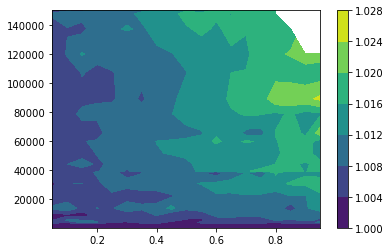

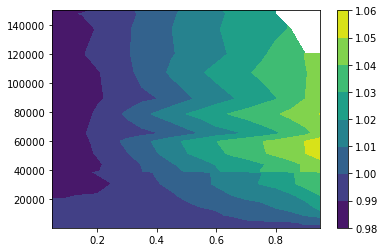

In [192]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_FTgUU" / "results.csv")
df = df[(df["ip_expect"]!="None")]
df["ip_expect"] = df["ip_expect"].apply(lambda x: float(x))
df["ratio_dep"] = df["ratio_dep"].apply(lambda x: float(x))
df["ratio_deg"] = df["ratio_deg"].apply(lambda x: float(x))
df["edge_size"] = df["edge_size"].apply(lambda x: float(x))
df = df[(df["ip_expect"]!=0)]

Z = df.pivot_table(index='transmission_rate', columns='edge_size', values='ratio_dep').T.values

X_unique = np.sort(df.transmission_rate.unique())
Y_unique = np.sort(df.edge_size.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

Z = df.pivot_table(index='transmission_rate', columns='edge_size', values='ratio_deg').T.values
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

## OVERLAP

In [30]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_dqv9r" / "results.csv")
avg_ratio = np.array([float(i) for i in df[(df["ratio"]!= '-1') & (df["ratio"]!="None")].ratio]).mean()
print(avg_ratio)

0.8740816110385429


0.8757022912192238
444


Text(0, 0.5, 'Quarantine Set Overlap (% of DepRound)')

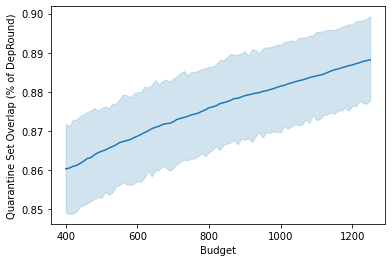

In [212]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_gqFXx" / "results.csv")
df = df[(df["ratio"]!="None")]
df["ratio"] = df["ratio"].apply(lambda x: float(x))
df = df[(df["ratio"]!= -1)]

print(np.array([float(i) for i in df.ratio]).mean())

print(len(df.from_cache.unique()))

#df_mean = df.groupby('budget', as_index=False).mean()

import seaborn as sns
#sns.scatterplot(data = df_mean, x = "budget", y = "ratio")
sns.lineplot(data = df, x = "budget", y = "ratio")
plt.xlabel("Budget")
plt.ylabel("Quarantine Set Overlap (% of DepRound)")

#plt.savefig('../output/plots/mont_overlap_budget.png', dpi=300, bbox_inches = 'tight')

## INFORMATION LOSS

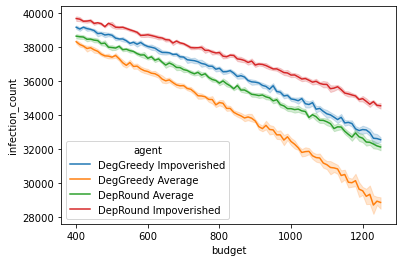

In [83]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

import seaborn as sns
sns.lineplot(data = df, x = "budget", y ="infection_count", hue = "agent")
plt.show()

In [209]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df, df_avg])

df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/75457

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

def determine(x):
    if x == "DegGreedy Full" or x=="DepRound Full": return "Full Knowledge"
    elif x == "DegGreedy Average" or x=="DepRound Average": return "Average"
    elif x == "DegGreedy Impoverished" or x=="DepRound Impoverished": return "Impoverished"

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg = df[(df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished")]
df_dep = df[(df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished")]


<AxesSubplot:xlabel='budget', ylabel='Diff'>

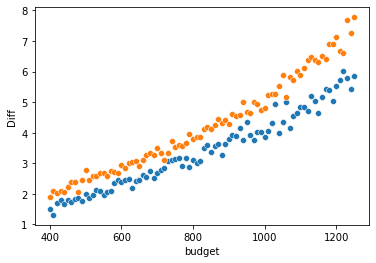

In [208]:
df_dep = df_dep.groupby(["budget", "Information Loss"], as_index = False).mean()
df_deg = df_deg.groupby(["budget", "Information Loss"], as_index = False).mean()

df_deg_diff = pd.DataFrame()
df_deg_diff["budget"] = df_deg.budget.unique()
df_deg = df_deg.set_index("budget")

df_dep_diff = pd.DataFrame()
df_dep_diff["budget"] = df_dep.budget.unique()
df_dep = df_dep.set_index("budget")

df_deg_diff["Full"] = df_deg_diff["budget"].apply(lambda x:
                                    df_deg[df_deg["Information Loss"]=="Full Knowledge"].at[x, "infected"])
df_deg_diff["Average"] = df_deg_diff["budget"].apply(lambda x: 
                                    df_deg[df_deg["Information Loss"]=="Average"].at[x, "infected"])
df_deg_diff["Impoverished"] = df_deg_diff["budget"].apply(lambda x: 
                                        df_deg[df_deg["Information Loss"]=="Impoverished"].at[x, "infected"])

df_dep_diff["Full"] = df_dep_diff["budget"].apply(lambda x:
                                    df_dep[df_dep["Information Loss"]=="Full Knowledge"].at[x, "infected"])
df_dep_diff["Average"] = df_dep_diff["budget"].apply(lambda x: 
                                    df_dep[df_dep["Information Loss"]=="Average"].at[x, "infected"])
df_dep_diff["Impoverished"] = df_dep_diff["budget"].apply(lambda x: 
                                        df_dep[df_dep["Information Loss"]=="Impoverished"].at[x, "infected"])

df_deg_diff["Diff"] = df_deg_diff["Impoverished"].subtract(df_deg_diff["Full"])
df_dep_diff["Diff"] = df_dep_diff["Impoverished"].subtract(df_dep_diff["Full"])

import seaborn as sns
sns.scatterplot(data = df_deg_diff, x = "budget", y = "Diff")
sns.scatterplot(data = df_dep_diff, x = "budget", y = "Diff")

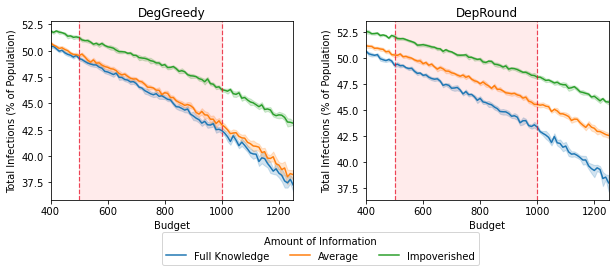

In [155]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df, df_avg])

df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/75457

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

def determine(x):
    if x == "DegGreedy Full" or x=="DepRound Full": return "Full Knowledge"
    elif x == "DegGreedy Average" or x=="DepRound Average": return "Average"
    elif x == "DegGreedy Impoverished" or x=="DepRound Impoverished": return "Impoverished"

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg = df[(df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished")]
df_dep = df[(df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished")]

fig, ax = plt.subplots(1,2,figsize=(10,3))

import seaborn as sns

ax0 = sns.lineplot(data=df_deg, x="budget", y="infected", hue="Information Loss", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0].set_xlim(400,1250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep, x="budget", y="infected", hue="Information Loss", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Total Infections (% of Population)")
ax[1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].axvspan(500, 1000, alpha=0.08, color='red')
ax[1].set_xlim(400,1250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')

pad = 5 # in points

ax[0].annotate("DegGreedy", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[1].annotate("DepRound", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

plt.subplots_adjust(wspace = 0.3)
fig.subplots_adjust(top=0.95)

fig.legend(["Full Knowledge", "Average", "Impoverished"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.2), prop={'size':10})

#fig.savefig('../output/plots/mont_average_model.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [50]:
df_m = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_m = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_c = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_c = pd.read_csv(PROJECT_ROOT / "output" / "run_BxjJA" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df_m, df_avg_m, df_c, df_avg_c])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_c =  df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_c = df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]


In [51]:
df_dep_c = df_dep_c.groupby(["budget", "Information Loss"], as_index = False).mean()
df_deg_c = df_deg_c.groupby(["budget", "Information Loss"], as_index = False).mean()

from scipy import stats

x = np.array(df_dep_c[df_dep_c["Information Loss"]=="Impoverished"]["budget"])
y = np.array(df_dep_c[df_dep_c["Information Loss"]=="Impoverished"]["infected"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

x = df_deg_c[df_deg_c["Information Loss"]=="Impoverished"]["budget"]
y = df_deg_c[df_deg_c["Information Loss"]=="Impoverished"]["infected"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

-0.0018967837581246527 57.58925708440873
-0.0027303785192447673 58.03510373174422


In [52]:
x = np.array(df_dep_c[df_dep_c["Information Loss"]=="Average"]["budget"])
y = np.array(df_dep_c[df_dep_c["Information Loss"]=="Average"]["infected"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

x = df_deg_c[df_deg_c["Information Loss"]=="Average"]["budget"]
y = df_deg_c[df_deg_c["Information Loss"]=="Average"]["infected"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

-0.0031605548340977907 57.610286020161446
-0.0037940402113697843 57.649598301728695


In [173]:
df_dep = df_dep.groupby(["budget", "Information Loss"], as_index = False).mean()
df_deg = df_deg.groupby(["budget", "Information Loss"], as_index = False).mean()

from scipy import stats

x = np.array(df_dep[df_dep["Information Loss"]=="Impoverished"]["budget"])
y = np.array(df_dep[df_dep["Information Loss"]=="Impoverished"]["infected"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

x = df_deg[df_deg["Information Loss"]=="Impoverished"]["budget"]
y = df_deg[df_deg["Information Loss"]=="Impoverished"]["infected"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

-0.007909611919162873 56.015131499220416
-0.010199966105175482 56.48109840906683


In [210]:
df_dep = df_dep.groupby(["budget", "Information Loss"], as_index = False).mean()
df_deg = df_deg.groupby(["budget", "Information Loss"], as_index = False).mean()

from scipy import stats

x = np.array(df_dep[df_dep["Information Loss"]=="Average"]["budget"])
y = np.array(df_dep[df_dep["Information Loss"]=="Average"]["infected"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

x = df_deg[df_deg["Information Loss"]=="Average"]["budget"]
y = df_deg[df_deg["Information Loss"]=="Average"]["infected"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept)

-0.010131674709761333 55.612240729412505
-0.014405444455071527 57.050709860379015


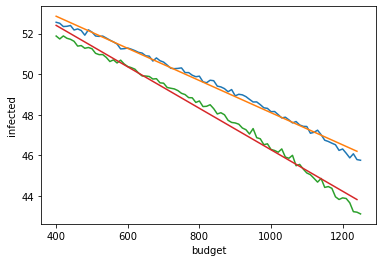

In [174]:
m1, b1 = -0.007909611919162873, 56.015131499220416
m2, b2 = -0.010199966105175482, 56.48109840906683

sns.lineplot(data=df_dep[df_dep["Information Loss"]=="Impoverished"], x="budget", y="infected")
plt.plot([i for i in range(400, 1250, 10)], [m1*i+b1 for i in range(400, 1250, 10)])

sns.lineplot(data=df_deg[df_deg["Information Loss"]=="Impoverished"], x="budget", y="infected")
plt.plot([i for i in range(400, 1250, 10)], [m2*i+b2 for i in range(400, 1250, 10)])

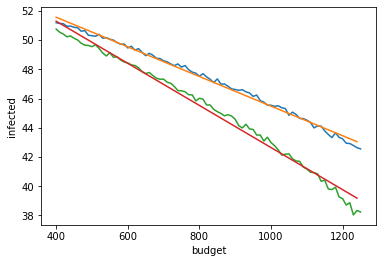

In [211]:
m1, b1 = -0.010131674709761333, 55.612240729412505
m2, b2 = -0.014405444455071527, 57.050709860379015

sns.lineplot(data=df_dep[df_dep["Information Loss"]=="Average"], x="budget", y="infected")
plt.plot([i for i in range(400, 1250, 10)], [m1*i+b1 for i in range(400, 1250, 10)])

sns.lineplot(data=df_deg[df_deg["Information Loss"]=="Average"], x="budget", y="infected")
plt.plot([i for i in range(400, 1250, 10)], [m2*i+b2 for i in range(400, 1250, 10)])

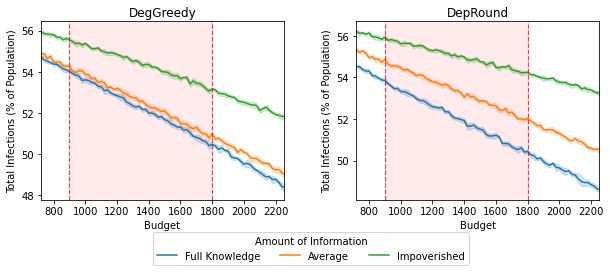

In [61]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg = pd.read_csv(PROJECT_ROOT / "output" / "run_BxjJA" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df, df_avg])

df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/131219

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

def determine(x):
    if x == "DegGreedy Full" or x=="DepRound Full": return "Full Knowledge"
    elif x == "DegGreedy Average" or x=="DepRound Average": return "Average"
    elif x == "DegGreedy Impoverished" or x=="DepRound Impoverished": return "Impoverished"

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg = df[(df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished")]
df_dep = df[(df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished")]



fig, ax = plt.subplots(1,2,figsize=(10,3))

import seaborn as sns

ax0 = sns.lineplot(data=df_deg, x="budget", y="infected", hue="Information Loss", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].axvspan(900, 1800, alpha=0.08, color='red')
ax[0].set_xlim(720,2250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep, x="budget", y="infected", hue="Information Loss", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Total Infections (% of Population)")
ax[1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1].set_xlim(720,2250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')

pad = 5 # in points

ax[0].annotate("DegGreedy", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[1].annotate("DepRound", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

plt.subplots_adjust(wspace = 0.3)
fig.subplots_adjust(top=0.95)

fig.legend(["Full Knowledge", "Average", "Impoverished"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.2), prop={'size':10})

#fig.savefig('../output/plots/cville_average_info.png', dpi=300, bbox_inches = 'tight')

plt.show()

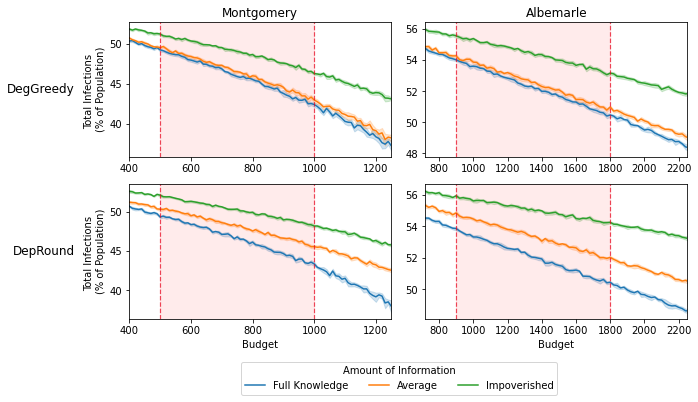

In [79]:
df_m = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_m = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_c = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_c = pd.read_csv(PROJECT_ROOT / "output" / "run_BxjJA" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df_m, df_avg_m, df_c, df_avg_c])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_c =  df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_c = df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]

fig, ax = plt.subplots(2,2,figsize=(10,5))

import seaborn as sns

ax0 = sns.lineplot(data=df_deg_m, x="budget", y="infected", hue="Information Loss", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep_m, x="budget", y="infected", hue="Information Loss", ax=ax[1, 0])
ax1.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections \n(% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

ax0 = sns.lineplot(data=df_deg_c, x="budget", y="infected", hue="Information Loss", ax=ax[0, 1])
ax0.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720,2250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep_c, x="budget", y="infected", hue="Information Loss", ax=ax[1, 1])
ax1.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720,2250)

#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("DegGreedy", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("DepRound", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

plt.subplots_adjust(wspace = 0.13)
fig.subplots_adjust(top=0.95)

fig.legend(["Full Knowledge", "Average", "Impoverished"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.1), prop={'size':10})

fig.savefig('../output/plots/combined_realistic_model.png', dpi=300, bbox_inches = 'tight')

plt.show()

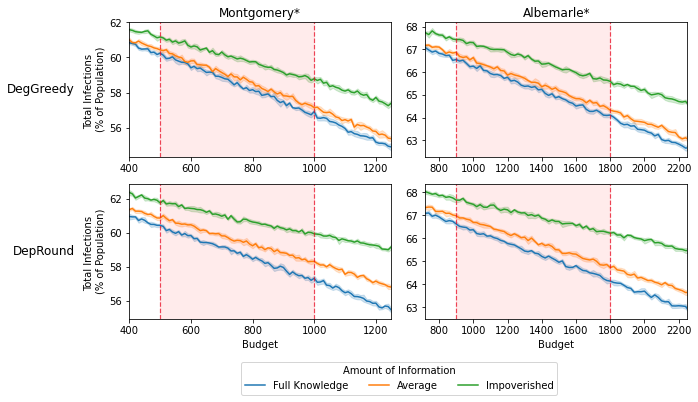

In [104]:
df_m = pd.read_csv(PROJECT_ROOT / "output" / "run_Txksw" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_m = pd.read_csv(PROJECT_ROOT / "output" / "run_7bLKB" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_c = pd.read_csv(PROJECT_ROOT / "output" / "run_X9z7Y" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_c = pd.read_csv(PROJECT_ROOT / "output" / "run_k23WZ" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df_m, df_avg_m, df_c, df_avg_c])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg_m = df[(df["G"] == "montgomery_extra") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_m = df[(df["G"] == "montgomery_extra") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_c =  df[(df["G"] == "cville_extra") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_c = df[(df["G"] == "cville_extra") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]

fig, ax = plt.subplots(2,2,figsize=(10,5))

import seaborn as sns

ax0 = sns.lineplot(data=df_deg_m, x="budget", y="infected", hue="Information Loss", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep_m, x="budget", y="infected", hue="Information Loss", ax=ax[1, 0])
ax1.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections \n(% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

ax0 = sns.lineplot(data=df_deg_c, x="budget", y="infected", hue="Information Loss", ax=ax[0, 1])
ax0.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720,2250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep_c, x="budget", y="infected", hue="Information Loss", ax=ax[1, 1])
ax1.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720,2250)

#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')

pad = 5 # in points

ax[0, 0].annotate("Montgomery*", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle*", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("DegGreedy", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("DepRound", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

plt.subplots_adjust(wspace = 0.13)
fig.subplots_adjust(top=0.95)

fig.legend(["Full Knowledge", "Average", "Impoverished"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.1), prop={'size':10})

#fig.savefig('../output/plots/combined_realistic_model.png', dpi=300, bbox_inches = 'tight')

plt.show()

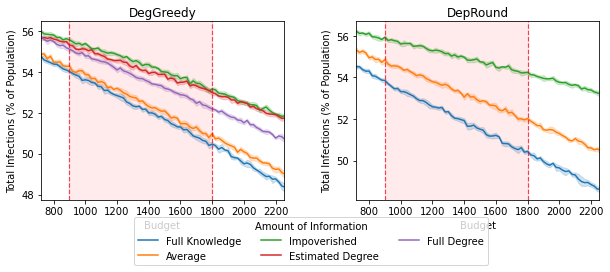

In [320]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg = pd.read_csv(PROJECT_ROOT / "output" / "run_BxjJA" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_seg = pd.read_csv(PROJECT_ROOT / "output" / "run_5mxQv" / "results.csv")
df_deg2 = pd.read_csv(PROJECT_ROOT / "output" / "run_KJMRU" / "results.csv")

df = pd.concat([df, df_avg, df_seg, df_deg2])

df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/131219

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

def determine(x):
    if x == "DegGreedy Full" or x=="DepRound Full": return "Full Knowledge"
    elif x == "DegGreedy Average" or x=="DepRound Average": return "Average"
    elif x == "DegGreedy Impoverished" or x=="DepRound Impoverished": return "Impoverished"
    elif x == "Degree2": return "Degree2"
    else: return "Estimated Degree"

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"], 
                df[df["Information Loss"] == "Degree2"], df[df["Information Loss"] == "Estimated Degree"]])

df_deg = df[(df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished")]
df_dep = df[(df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished")]

df_seg = df[df["Alg for MinExposed"]== "segmented_greedy"]
df_deg2 = df[df["Alg for MinExposed"]== "Degree2"]

fig, ax = plt.subplots(1,2,figsize=(10,3))

import seaborn as sns

ax0 = sns.lineplot(data=pd.concat([df_deg, df_seg, df_deg2]), x="budget", y="infected", hue="Information Loss", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0].text(680, 41, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0].text(830, 41, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].axvspan(900, 1800, alpha=0.08, color='red')
ax[0].set_xlim(720,2250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df_dep, x="budget", y="infected", hue="Information Loss", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Total Infections (% of Population)")
ax[1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1].text(680, 42, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
#ax[1].text(830, 42, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1].set_xlim(720,2250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')

pad = 5 # in points

ax[0].annotate("DegGreedy", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[1].annotate("DepRound", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

plt.subplots_adjust(wspace = 0.3)
fig.subplots_adjust(top=0.95)

fig.legend(["Full Knowledge", "Average", "Impoverished", "Estimated Degree", "Full Degree"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.2), prop={'size':10})

#fig.savefig('../output/plots/cville_average_info.png', dpi=300, bbox_inches = 'tight')

plt.show()

## FAIRNESS

In [117]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]
G = load_graph_montgomery_labels()
state = InfectionState(G, (S, I1, I2, R), 750, "equal", 0.05, True, 0.8, True, 1, 1)
q_total = set()

agent = DegGreedy_fair

while len(state.SIR.I1) + len(state.SIR.I2) != 0:
    to_quarantine = agent(state)
    q_total|=(to_quarantine)
    state.step(to_quarantine)
    infections.append(len(state.SIR.I2))

labels = [0, 1, 2, 3, 4]

q_age_count = [0, 0, 0, 0, 0]
for i in q_total:
    q_age_count[G.nodes[i]["age_group"]] += 1

frequencies = list(nx.get_node_attributes(G, 'age_group').values())

for i, count in enumerate(q_age_count):
    total = frequencies.count(i)
    if total != 0:
        q_age_count[i] = count/total
    else:
        q_age_count[i] = 0

print(q_age_count)

[0.15360637017376008, 0.16020693053046478, 0.15867842535787322, 0.1545500762582613, 0.15678116147308782]


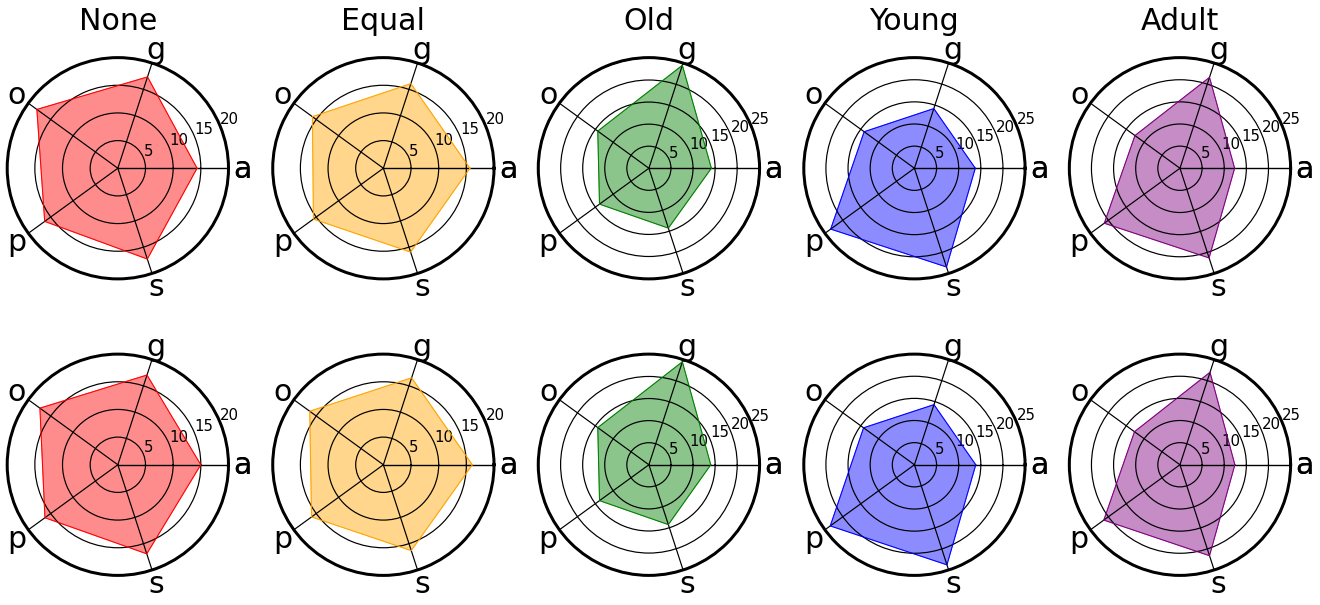

In [243]:
df_o = pd.read_csv(PROJECT_ROOT / "output" / "run_D6JeL" / "results.csv")
df_o["q_age_count"] = df_o["q_age_count"].apply(lambda x: [float(i) for i in x.strip("[]").split(", ")])

df = df_o[(df_o["budget"]==750)]
df.groupby("policy")

df_none = df[df["policy"]=="none"]
df_equal = df[df["policy"]=="equal"]
df_old = df[df["policy"]=="old"]
df_young = df[df["policy"]=="young"]
df_adult = df[df["policy"]=="adult"]

data_none_deg = np.array([v for v in df_none[df_none["agent"]=="DegGreedy_fair"].q_age_count.values])
avg_none_deg = np.average(data_none_deg, axis = 0)
data_equal_deg = np.array([v for v in df_equal[df_equal["agent"]=="DegGreedy_fair"].q_age_count.values])
avg_equal_deg = np.average(data_equal_deg, axis = 0)
data_old_deg = np.array([v for v in df_old[df_old["agent"]=="DegGreedy_fair"].q_age_count.values])
avg_old_deg = np.average(data_old_deg, axis = 0)
data_young_deg = np.array([v for v in df_young[df_young["agent"]=="DegGreedy_fair"].q_age_count.values])
avg_young_deg = np.average(data_young_deg, axis = 0)
data_adult_deg = np.array([v for v in df_adult[df_adult["agent"]=="DegGreedy_fair"].q_age_count.values])
avg_adult_deg = np.average(data_adult_deg, axis = 0)
lists_deg = [avg_none_deg, avg_equal_deg, avg_old_deg, avg_young_deg, avg_adult_deg]

data_none_dep = np.array([v for v in df_none[df_none["agent"]=="DepRound_fair"].q_age_count.values])
avg_none_dep = np.average(data_none_dep, axis = 0)
data_equal_dep = np.array([v for v in df_equal[df_equal["agent"]=="DepRound_fair"].q_age_count.values])
avg_equal_dep = np.average(data_equal_dep, axis = 0)
data_old_dep = np.array([v for v in df_old[df_old["agent"]=="DepRound_fair"].q_age_count.values])
avg_old_dep = np.average(data_old_dep, axis = 0)
data_young_dep = np.array([v for v in df_young[df_young["agent"]=="DepRound_fair"].q_age_count.values])
avg_young_dep = np.average(data_young_dep, axis = 0)
data_adult_dep = np.array([v for v in df_adult[df_adult["agent"]=="DepRound_fair"].q_age_count.values])
avg_adult_dep = np.average(data_adult_dep, axis = 0)
lists_dep = [avg_none_dep, avg_equal_dep, avg_old_dep, avg_young_dep, avg_adult_dep]

titles = ["None", "Equal", "Old", "Young", "Adult"]
colors = ['red', 'orange', 'green','blue','purple']
points = 5

angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(2, 5, figsize=(23, 10), subplot_kw=dict(polar=True))

grids = [
    [5, 10, 15, 20],
    [5, 10, 15, 20],
    [5, 10, 15, 20, 25],
    [5, 10, 15, 20, 25],
    [5, 10, 15, 20, 25]
]

for i in range(5):
    ax[0][i].set_title(titles[i], fontsize = 30)
    ax[0][i].plot(angles, 100.0*np.array(list(lists_deg[i]) + list(lists_deg[i][:1])), color=colors[i], linewidth=1, label='A')
    ax[0][i].fill(angles, 100.0*np.array(list(lists_deg[i]) + list(lists_deg[i][:1])), color=colors[i], alpha=0.45)
    ax[0][i].set_thetagrids(np.degrees(angles), ["a", "g", "o", "p", "s", "a"], fontsize=30)
    ax[0][i].set_rgrids(grids[i],fontsize=15)
    ax[0][i].grid(b=True, linewidth=1.2, color='#000000')
    ax[0][i].spines['polar'].set_color('black')
    ax[0][i].spines['polar'].set_linewidth(3)
    ax[0][i].spines['polar'].set_linestyle('-')
    
    ax[1][i].plot(angles, 100.0*np.array(list(lists_dep[i]) + list(lists_dep[i][:1])), color=colors[i], linewidth=1, label='A')
    ax[1][i].fill(angles, 100.0*np.array(list(lists_dep[i]) + list(lists_dep[i][:1])), color=colors[i], alpha=0.45)
    ax[1][i].set_thetagrids(np.degrees(angles), ["a", "g", "o", "p", "s", "a"], fontsize=30)
    ax[1][i].set_rgrids(grids[i],fontsize=15)
    ax[1][i].grid(b=True, linewidth=1.2, color='#000000')
    ax[1][i].spines['polar'].set_color('black')
    ax[1][i].spines['polar'].set_linewidth(3)
    ax[1][i].spines['polar'].set_linestyle('-')

#fig.savefig("../output/plots/combined_peak_infection.png", dpi=300, bbox_inches = 'tight')

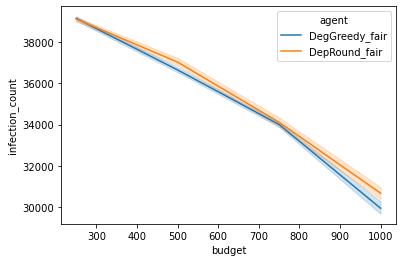

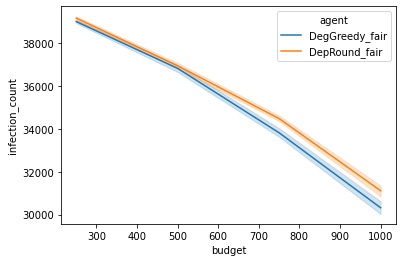

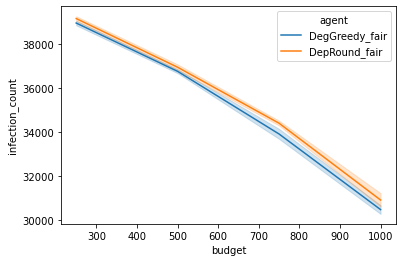

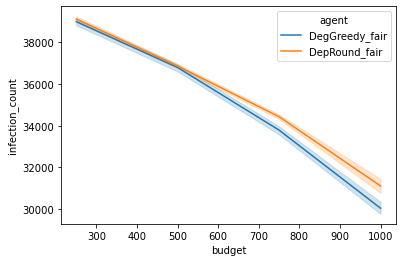

In [247]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_D6JeL" / "results.csv")
import seaborn as sns

sns.lineplot(data = df[(df["policy"]=="equal")], x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data = df[(df["policy"]=="old")], x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data = df[(df["policy"]=="adult")], x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data = df[(df["policy"]=="young")], x = "budget", y = "infection_count", hue = "agent")
plt.show()

## OVERLAP

In [105]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_btrYx" / "results.csv")
df = df[:449]
df2 = pd.read_csv(PROJECT_ROOT / "output" / "run_m64Hv" / "results.csv")

df = pd.concat([df, df2])

def checkValid(x):
    for i in x:
        if i == -1:
            return False
    return True

df = df[df["d"] != "None"]
df["overlaps"] = df["total"].apply(lambda x: [float(i) for i in x.strip("[]").split(", ")])
df["valid"] = df["overlaps"].apply(lambda x: checkValid(x))
df = df[df["valid"]]

data = np.array([v for v in df.overlaps.values])
avg = np.average(data, axis = 0)

#print(avg)

table = ""

headers = ["Dep", "Greedy", "Avg", "Degree", "Seg"]

title = "\t\t".join(headers)

print("\t\t" + title)
print()

index = 0
for i in range(5):
    table+= headers[i] + "\t\t"
    for j in range(5):
        if (j < i):
            table += "-" + "\t\t"
        else:
            table += str(round(avg[index], 3)) + "\t\t"
            index+=1
    table += "\n"
            
print(table)

		Dep		Greedy		Avg		Degree		Seg

Dep		1.0		0.831		0.697		0.513		0.46		
Greedy		-		1.0		0.784		0.588		0.508		
Avg		-		-		1.0		0.621		0.517		
Degree		-		-		-		1.0		0.529		
Seg		-		-		-		-		1.0		



## HELPER CODE

In [109]:
'''letter = [i+ord('a') for i in range(0, 16)]
for i in range(16):
    G = load_graph_montgomery_labels()

    I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
    S = set(G.nodes)-I1

    count = 0
    infections = []
    state = InfectionState(G, (list(S),list(I1),[],[]), 0, "none", 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        state.step({})
        count+=1
        infections.append(len(state.SIR.I2))
        if (count >= 5 and count <= 35):
            dictD = {}
            dictD["S"] = state.SIR.S
            dictD["I1"] = state.SIR.I1
            dictD["I2"] = state.SIR.I2
            dictD["R"] = state.SIR.R
            dictD["infections"] = infections
            file_name = "m"+ str(chr(letter[i])) + str(count) + ".json"
            with open(PROJECT_ROOT / "data" / "SIR_Cache"/"optimal_trials"/"montgomery_trials"/file_name, 'w') as outfile:
                json.dump(dictD, outfile)
'''

In [110]:
"""letter = [i+ord('a') for i in range(0, 16)]
for i in range(16):
    G = load_graph_cville_labels()

    I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
    S = set(G.nodes)-I1

    count = 0
    infections = []
    state = InfectionState(G, (list(S),list(I1),[],[]), 0, "none", 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        state.step({})
        count+=1
        infections.append(len(state.SIR.I2))
        if (count >= 5 and count <= 40):
            dictD = {}
            dictD["S"] = state.SIR.S
            dictD["I1"] = state.SIR.I1
            dictD["I2"] = state.SIR.I2
            dictD["R"] = state.SIR.R
            dictD["infections"] = infections
            file_name = "c"+ str(chr(letter[i])) + str(count) + ".json"
            with open(PROJECT_ROOT / "data" / "SIR_Cache"/"optimal_trials"/"cville_trials"/file_name, 'w') as outfile:
                json.dump(dictD, outfile)"""

In [281]:
def Degree2(state: InfectionState):
    degrees: List[Tuple[int, int]] = []
    for u in state.V1:
        count = state.G.degree[u]
        degrees.append((count, u))
        
    degrees.sort(reverse=True)
    return {i[1] for i in degrees[:state.budget]}

with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]
G = load_graph_montgomery_labels()
state = InfectionState(G, (S, I1, I2, R), 750, "equal", 0.05, True, 0.8, True, 1, 1)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(Degree2(state))
    print(len(state.SIR.R))

341
610
1078
1610
2280
3133
4259
5729
7583
9887
12701
15866
19285
22706
25782
28518
30627
32167
33285
34024
34514
34824
34991
35061
35087
35095
35100


In [322]:
import time
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]
G = load_graph_montgomery_labels()
start = time.time()
state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 1, 1)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(DepRound_fair(state))
    #print(len(state.SIR.R))
print(time.time()-start)

340.1039488315582


In [323]:
import time
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]

G = load_graph_cville_labels()
start = time.time()
state = InfectionState(G, (S, I1, I2, R), 1350, "none", 0.05, True, 0.8, True, 1, 1)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(DepRound_fair(state))
    #print(len(state.SIR.R))
print(time.time()-start)

1231.4359526634216


In [328]:
def find_excluded_contours_edges_PQ2(G: nx.Graph, infected: Set[int], excluded: Set[int], transmission_rate: float, snitch_rate:float = 1, transmission_known: bool = True):
    #v1 = set().union(*[effective_neighbor(G, v, G.neighbors(v)) for v in set(infected)]) - (set(infected) | set(excluded))
    #v1_k = {v for v in v1 if random.uniform(0,1) < discovery_rate}
    #P = {v: (1 - math.prod(1-(G[i][v]["transmission"] if check_edge_transmission(G, i, v) else 0) for i in set(set(G.neighbors(v)) & set(infected)))) for v in v1_k}
    
    P = {}
    v1_k = set()
    exclusion = (set(infected) | set(excluded))
    for v in infected:
        for nbr in effective_neighbor(G, v, G.neighbors(v)):
            if nbr not in exclusion and (random.uniform(0,1) < snitch_rate):
                v1_k.add(nbr)
                if transmission_known:
                    if nbr in P:
                        P[nbr] *= 1-G[v][nbr]["transmission"]
                    else:
                        P[nbr] = 1-G[v][nbr]["transmission"]
                else:
                    if nbr in P:
                        P[nbr] *= 1-transmission_rate
                    else:
                        P[nbr] = 1-transmission_rate
                    
    for key,value in P.items():
        P[key] = 1-value
    
    v2_k = set()
    Q = {}
    exclusion = (set(infected) | set(excluded) | set(v1_k) )
    for u in v1_k:
        for v in set(G.neighbors(u))-exclusion:
            if check_edge_transmission(G, u, v) and (random.uniform(0,1) < snitch_rate):
                if transmission_known:
                    if u in Q:
                        Q[u][v] = G[u][v]["transmission"]
                    else:
                        Q[u] = {v: G[u][v]["transmission"]}
                else:
                    if u in Q:
                        Q[u][v] = transmission_rate
                    else:
                        Q[u] = {v: transmission_rate}
                v2_k.add(v)
            else:
                if u in Q:
                    Q[u][v] = 0
                else:
                    Q[u] = {v:0}
    return v1_k, v2_k, P, Q

with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]
G = load_graph_montgomery_labels()
start = time.time()
state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 1, 1)
v1_k, v2_k, P, Q = find_excluded_contours_edges_PQ2(G, state.SIR.I2, state.SIR.R, state.transmission_rate, state.snitch_rate, state.transmission_known)
print(len(v1_k), len(v2_k), len(P.keys()), len(Q.keys()))

2951 22863 2951 2842


In [343]:
state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 1, 0.8)
v1_k, v2_k, P, Q = find_excluded_contours_edges_PQ2(G, state.SIR.I2, state.SIR.R, state.transmission_rate, state.snitch_rate, state.transmission_known)
print(len(v1_k), len(v2_k), len(P.keys()), len(Q.keys()))

total = 0
for q in Q.values():
    total += len(q)
print(total)

2485 17751 2485 2431
38166


In [347]:
def pq_independent_simp(G: nx.Graph, I: Iterable[int], V1: Iterable[int], V2: Iterable[int], P_state, Q_state):
    P = {v:1 for v in P_state}
    Q = {u:{v:1 if Q_state[u][v] != 0 else 0 for v in Q_state[u].keys()} for u in Q_state.keys()}
    return P, Q

state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 0.8)
P, Q = pq_independent_simp(G, state.SIR.I2, state.V1, state.V2, state.P, state.Q)
print(set(P.values()))
george = []
for q in Q.values():
    george += list(q.values())
print(set(george))

{1}
{0, 1}


In [348]:
print(len(P), len(Q))

2440 2390


In [351]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
        j = json.load(infile)

        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]
G = load_graph_montgomery_labels()
state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 0.8)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(DepRound_fair(state))
    print(len(state.SIR.R))

341
610
1079
1625
2293
3169
4221
5710
7481
9764
12501
15550
18837
22196
25245
27828
29950
31465
32520
33245
33723
34012
34182
34280
34307
34325
34332
34335
34336
